### Preprocessing 

In [58]:

import pandas as pd
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_score,recall_score,auc




In [59]:
import warnings
warnings.filterwarnings("ignore")

#### Loading the data set

In [127]:

train_data = pd.read_csv(r"C:\Users\lalal\Desktop\code_tutorial\ML\data\final\train_values.csv")
train_labels = pd.read_csv(r"C:\Users\lalal\Desktop\code_tutorial\ML\data\final\train_labels.csv")
test_labels = pd.read_csv(r"C:\Users\lalal\Desktop\code_tutorial\ML\data\final\test_values.csv")

In [67]:
building_damage1 = train_data.merge(train_labels, how = 'inner', on = 'building_id')

In [68]:
building_damage1.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [69]:
def feature_info(feature):
    print('Unique values in the feature:',feature.unique())
    print('No of Null values:',feature.isna().sum())

### Data Preparation

In [76]:
from functools import reduce

In [77]:
building_damage1 = building_damage1.drop(columns ="has_secondary_use")

In [78]:
building_damage1 = building_damage1.drop(columns ="has_secondary_use_agriculture")

In [80]:
building_damage = building_damage1[building_damage1['age'] <= 250]

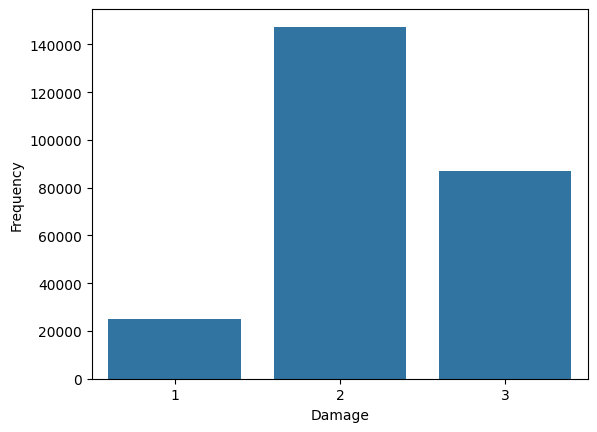

In [123]:
# Vẽ biểu đồ tần suất
sns.countplot(x='damage_grade', data=building_damage)

# Đặt tên cho trục x và y
plt.xlabel('Damage')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()


In [82]:
print('Shape of final raw data matrix:',building_damage.shape)
print('No of labels:',len(building_damage))
feature_info(building_damage.damage_grade)


Shape of final raw data matrix: (259211, 38)
No of labels: 259211
Unique values in the feature: [3 2 1]
No of Null values: 0


#### utility function to preprocess data

In [129]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
def preprocess_num_data(X_train,num_data,X_test):
    std=Normalizer()
    std.fit(train_data)
    transformed_input=std.transform(building_damage)
    transformed_test=std.transform(test_labels)
    return transformed_input,transformed_test
def preprocess_cat_data(building_damage,test_labels):
    std=LabelEncoder()
    for col in train_data.columns:
        col_list_train=list(map(str,building_damage[col].values))
        #print(col_list_train)
        col_list_test=list(map(str,test_labels[col].values))
        std.fit(col_list_train)
        col_list_train=std.transform(col_list_train)
        col_list_test=std.transform(col_list_test)
        building_damage[col]=col_list_train
        test_data[col]=col_list_test
    return building_damage,test_data

In [130]:
num_data=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq','area_percentage', 'age','height_percentage','count_families']
cat_data=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration'] 
bin_data=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
         'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [131]:
# filtering numerical data
num_train=building_damage[num_data]
num_test=test_labels[num_data]
# filtering categorical data
cat_train=building_damage[cat_data]
cat_test=building_damage[cat_data]
# filtering binary data
bin_train=building_damage[bin_data]
bin_test=test_labels[bin_data]


In [132]:
cat_feats = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration']

In [133]:
building_damage['damage_grade'] = building_damage['damage_grade'].astype('category')

In [134]:
train_final = pd.get_dummies(building_damage,columns=cat_feats,drop_first=True)
test_final = pd.get_dummies(test_labels,columns=cat_feats,drop_first=True)

In [135]:
train_final['damage_grade'].dtype


CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64)

In [136]:
train_final.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade', 'land_surface_condition_o',
       'land_surface_condition_t', 'founda

In [137]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             86868 non-null  int64
 1   geo_level_1_id                          86868 non-null  int64
 2   geo_level_2_id                          86868 non-null  int64
 3   geo_level_3_id                          86868 non-null  int64
 4   count_floors_pre_eq                     86868 non-null  int64
 5   age                                     86868 non-null  int64
 6   area_percentage                         86868 non-null  int64
 7   height_percentage                       86868 non-null  int64
 8   has_superstructure_adobe_mud            86868 non-null  int64
 9   has_superstructure_mud_mortar_stone     86868 non-null  int64
 10  has_superstructure_stone_flag           86868 non-null  int64
 11  has_superstruct

### Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [138]:
y_train=train_final.damage_grade
train=train_final.drop('damage_grade',axis=1)

In [139]:
X = train_final.drop('damage_grade',axis=1)
y = train_final['damage_grade']

train_final.shape

(259211, 60)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [141]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [143]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle
import random
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

# Linear regression

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_rounded = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_rounded)

print("Accuracy:", accuracy)

coefficients = model.coef_

intercept = model.intercept_

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

print("Coefficients:", coefficients,"\n ","\n ","\n ","\n ","\n ","\n ","\n ")
print("Intercept:", intercept)
print("MSE: ", mse)
print("R2: ", r_squared)

Accuracy: 0.5766399703717421
Coefficients: [-4.91427027e-04  9.30123841e-03 -4.29380479e-05  2.52873128e-03
  5.59234277e-02  2.33345479e-02 -8.03015224e-03  6.93324518e-03
  2.63167817e-02  8.59326567e-02  4.06804848e-02 -6.21025693e-03
  8.64375171e-03 -4.03933829e-02 -3.39040192e-02 -9.89679978e-03
 -1.52477250e-02 -2.95852849e-02 -1.40251251e-02  2.01324904e-02
 -7.65013194e-03 -1.26315317e-02 -3.62775277e-03  1.39191493e-03
 -1.76543431e-04 -1.87051297e-03 -1.02205629e-03  4.25701697e-04
 -9.37473309e-03  1.17296317e-02  6.92449578e-03 -2.82190138e-02
  4.12145680e-02  6.84830499e-03 -4.40838064e-02  3.22400535e-02
 -1.76073747e-02 -6.32838012e-03 -5.71949686e-02 -5.63774603e-03
 -3.76018775e-03 -3.77708522e-02 -1.28768905e-02 -9.24123140e-03
 -7.62858946e-03 -3.22252459e-03  3.20686923e-02  9.83950643e-03
  9.33080738e-03  1.74707183e-02  2.72815213e-03  3.76316325e-02
  1.16492340e-03  4.42561947e-04  1.81731159e-03  1.74679640e-03
  4.30125690e-02  4.05675517e-03  9.80091502e-0

In [153]:

def coefficients(X, y):
    Xt = np.dot(X.T, X)
    Xt_invert= np.linalg.inv(Xt)
    Xy = np.dot(X.T, y)
    coefficients = np.dot(Xt_invert, Xy)
    return coefficients

def predict(X_test, coefficients):
    y_pred = np.dot(X_test, coefficients)
    return y_pred

#add bias = 1
X_train1 = np.column_stack((np.ones(len(X_train)), X_train))
X_test1 = np.column_stack((np.ones(len(X_test)), X_test))

# model coefficients
coeffs = coefficients(X_train1, y_train)

#test
y_pred = np.round(predict(X_test1, coeffs),0).astype(int)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy,"\n Coefficients:", coeffs)

# def calculate_r_squared(y_true, y_pred):
#     y_mean = np.mean(y_true)
#     sst = np.sum((y_true - y_mean) ** 2)
#     sse = np.sum((y_true - y_pred) ** 2)
#     r_squared = 1 - sse / sst
#     return r_squared

# r_squared = calculate_r_squared(y_test, y_pred)
print("R2:", r_squared)


Accuracy: 0.5766399703717421 
 Coefficients: [ 2.23941916e+00 -4.91427027e-04  9.30123841e-03 -4.29380479e-05
  2.52873128e-03  5.59234277e-02  2.33345479e-02 -8.03015224e-03
  6.93324518e-03  2.63167817e-02  8.59326567e-02  4.06804848e-02
 -6.21025693e-03  8.64375171e-03 -4.03933829e-02 -3.39040192e-02
 -9.89679978e-03 -1.52477250e-02 -2.95852849e-02 -1.40251251e-02
  2.01324904e-02 -7.65013194e-03 -1.26315317e-02 -3.62775277e-03
  1.39191493e-03 -1.76543431e-04 -1.87051297e-03 -1.02205629e-03
  4.25701697e-04 -9.37473309e-03  1.17296317e-02  6.92449578e-03
 -2.82190138e-02  4.12145680e-02  6.84830499e-03 -4.40838064e-02
  3.22400535e-02 -1.76073747e-02 -6.32838012e-03 -5.71949686e-02
 -5.63774603e-03 -3.76018775e-03 -3.77708522e-02 -1.28768905e-02
 -9.24123140e-03 -7.62858946e-03 -3.22252459e-03  3.20686923e-02
  9.83950643e-03  9.33080738e-03  1.74707183e-02  2.72815213e-03
  3.76316325e-02  1.16492340e-03  4.42561947e-04  1.81731159e-03
  1.74679640e-03  4.30125690e-02  4.05675517e

# Logistic

3272 8021 53510


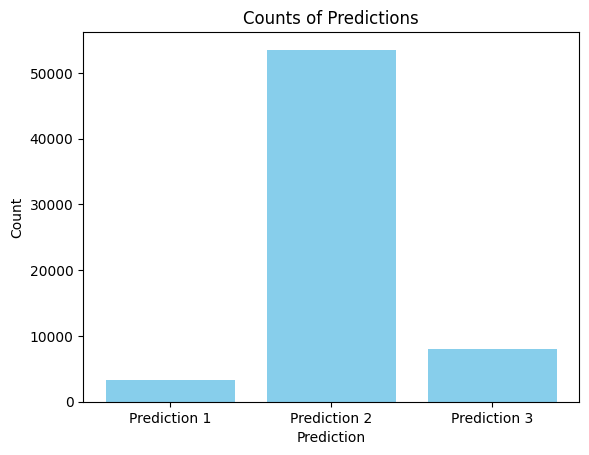

67177.5

In [161]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[0.01, 0.1, 1,5, 10], 'penalty':['l2']}
log_reg = linear_model.LogisticRegression(class_weight='none')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=0, n_jobs='none')

logmodel = LogisticRegression(class_weight=None)
p = logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print(sum(predictions == 1)
,sum(predictions == 3)
,sum(predictions == 2))

import matplotlib.pyplot as plt

# Values
values = [sum(predictions == 1), sum(predictions == 2), sum(predictions == 3)]
labels = ['Prediction 1', 'Prediction 2', 'Prediction 3']

# Create a bar plot
plt.bar(labels, values, color='skyblue')

# Add labels and title
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Counts of Predictions')

# Show plot
plt.show()

sum (predictions)/2

[[ 1929  4145   178]
 [ 1240 32253  3467]
 [  103 17112  4376]]


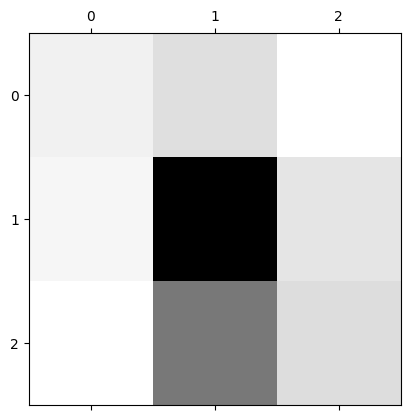

In [162]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm, cmap='binary')

In [163]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.5950033177476352
Kappa:     0.16138887242899813
